In [1]:
import numpy as np
import pandas as pd

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import re

import warnings 
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)

# **Data Preparation**

## **Load Dataset**

In [2]:
df_cust = pd.read_csv('data/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('data/olist_geolocation_dataset.csv')
df_order_items = pd.read_csv('data/olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('data/olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('data/olist_orders_dataset.csv')
df_products = pd.read_csv('data/olist_products_dataset.csv')
df_sellers = pd.read_csv('data/olist_sellers_dataset.csv')
df_cat = pd.read_csv('data/product_category_name_translation.csv')

## **Data Understanding**

**Brazilian E-Commerce Public Dataset by Olist**

This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 99k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates. 

### **Data Schema**

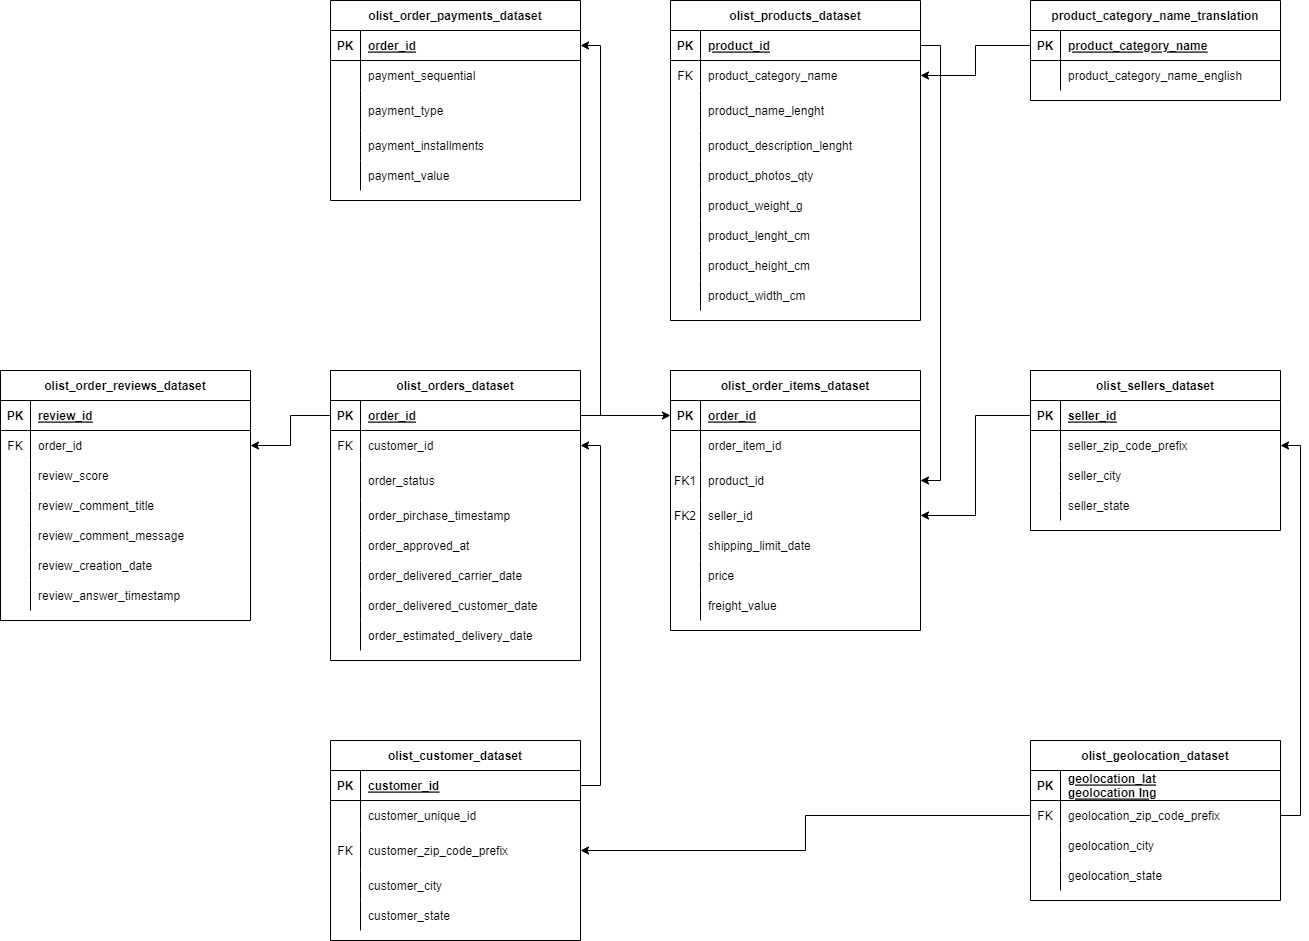


The image above is an Entity Relationship Diagram (ERD) that depicts the structure and relationships between various e-commerce datasets from Olist, an e-commerce platform in Brazil.

Here is a brief explanation of each dataset and their interconnections:

- `olist_customers_dataset`: Contains information about customers, including a customer_id that uniquely identifies each order and a customer_unique_id that uniquely identifies each customer.

- `olist_geolocation_dataset`: Includes geolocation data for Brazilian postal codes, providing latitude and longitude coordinates.

- `olist_order_items_dataset`: Details the items included in each order, linking products and sellers to orders via order_id, product_id, and seller_id.

- `olist_order_payments_dataset`: Tracks payment information for orders, such as payment type and value, connected to orders through order_id.

- `olist_order_reviews_dataset`: Includes customer reviews for orders, linked to orders via order_id.

- `olist_orders_dataset`: At the center of the schema, it records the order itself, including the timing of the purchase and delivery, linked to customers through customer_id.

- `olist_products_dataset`: Provides details about products, including the category, name, and dimensions of the product, linked to order items through product_id.

- `olist_sellers_dataset`: Contains information about the sellers, such as their location, linked to order items through seller_id.

- `product_category_name_translation`: Offers English translations for product category names, linked to products by the category name.

In the ERD, primary keys (PK) indicate unique identifiers for each dataset, while foreign keys (FK) show how datasets are interconnected, establishing relationships that enable comprehensive data analysis across different aspects of the e-commerce process.

### **Feature Description**

In [65]:
print('Customer Data Shape:',df_cust.shape)
display(df_cust.head())

Customer Data Shape: (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP


`df_cust`:

This table contains information about customers. Each row in the table represents a customer, with each customer identified by attributes or features represented by the columns in the table.

| Features | Description |
|-|-|
|`customer_id`| A unique code for each customer transaction or interaction |
|`customer_unique_id`| A unique code for each customer |
|`customer_zip_code_prefix`| The postal code prefix for the customer's address |
|`customer_city`| The city of the customer. |
|`customer_state`| The state of the customer. |

In [3]:
print('Geolocation Data Shape:',df_geolocation.shape)
display(df_geolocation.head())

Geolocation Data Shape: (1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


`df_geoloc`: 

This table contains data that identifies the geographical position in the real world or the physical location of various objects through GPS coordinates. Each row represents a unique geographical position.

| Features | Description |
|-|-|
|`geolocation_zip_code_prefix`| Prefix of the Brazilian zip code (CEP) for a specific area |
|`geolocation_lat`| Latitude coordinate of the location |
|`geolocation_lng`| Longitude coordinate of the location |
|`geolocation_city`| Name of the city corresponding to the geolocation |
|`geolocation_state`| Name of the state corresponding to the geolocation |

In [4]:
print('Order Items Data Shape:',df_order_items.shape)
display(df_order_items.head())

Order Items Data Shape: (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


`df_order_items`:

The table contains information about items ordered in an e-commerce system. Each row represent an item within an order.

| Features | Description |
|-|-|
|`order_id`| Unique identifier for the order. |
|`order_item_id`| A sequential number identifying each item within an order |
|`product_id`|  Unique identifier for the product |
|`seller_id`| Unique identifier for the seller of the product |
|`shipping_limit_date`| The deadline date for the product to be shipped |
|`price`| The price of the product |
|`freight_value`| The shipping cost for the product |

In [5]:
print('Order Payments Data Shape:',df_order_payments.shape)
display(df_order_payments.head())

Order Payments Data Shape: (103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


`df_order_payments`: 

This table contains information about payments made for orders in e-commerce. Each row represents a unique payment transaction, detailing how customers paid for their orders.

| Feature | Description |
|-|-|
| `order_id` | Unique identifier for each order |
| `payment_sequential` | Sequence number if there are multiple payments for an order |
| `payment_type` | The method of payment (e.g., credit card, boleto, voucher) |
| `payment_installments` | Number of payment installments with a credit card |
| `payment_value` | Total value paid for the order |

In [6]:
print('Order Reviews Data Shape:',df_order_reviews.shape)
display(df_order_reviews.head())

Order Reviews Data Shape: (99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


`df_order_reviews`: 

This table contains information about the reviews left by customers for orders they placed on an e-commerce platform. Each row represents a customer feedback on their orders.

| Feature | Description |
|-|-|
| `review_id` | Unique identifier for each review |
| `order_id` | Unique identifier for the order being reviewed |
| `review_score` | The review score given by the customer, scale from 1 to 5 |
| `review_comment_title` | Title of the review comment, if any |
| `review_comment_message` | Detailed comment or message left by the customer as part of the review |
| `review_creation_date` | The date and time when the review was created |
| `review_answer_timestamp` | Timestamp when the review was responded to by the seller or the platform |

In [7]:
print('Orders Data Shape:',df_orders.shape)
display(df_orders.head())

Orders Data Shape: (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


`df_orders`: 

This table contains information regarding orders placed by customers on e-commerce platforms. Each row represents one unique order from customers.

| Feature | Description |
|-|-|
| `order_id` | Unique identifier for each order |
| `customer_id` | Unique identifier for the customer who placed the order |
| `order_status` | Current status of the order (e.g., delivered, shipped, cancelled) |
| `order_purchase_timestamp` | Timestamp when the order was placed |
| `order_approved_at` | Timestamp when the order was approved |
| `order_delivered_carrier_date` | Timestamp when the order was handed over to the delivery carrier |
| `order_delivered_customer_date` | imestamp when the order was delivered to the customer |
| `order_estimated_delivery_date` | Estimated date for order delivery |

In [8]:
print('Products Data Shape:',df_products.shape)
display(df_products.head())

Products Data Shape: (32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


`df_products`: 

The table contains collection of product data from e-commerce platforms that contains information about various products such as product descriptions or sizes.

| Feature | Description |
|-|-|
| `product_id` | Unique identifier for each product |
| `product_category_name` | The category to which the product belongs |
| `product_name_lenght` | Length of the product name |
| `product_description_lenght` | Length of the product description |
| `product_photos_qty` | Quantity of photos available for the product |
| `product_weight_g` | Weight of the product in grams |
| `product_length_cm` | Length of the product in centimeters |
| `product_height_cm` | Height of the product in centimeters|
| `product_width_cm` | Width of the product in centimeters |

In [9]:
print('Sellers Data Shape:',df_sellers.shape)
display(df_sellers.head())

Sellers Data Shape: (3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


`df_sellers`: 

This table contains information about sellers registered on the e-commerce platform. Each row provides details about a single seller.

| Feature | Description |
|-|-|
| `seller_id` | Unique identifier for each seller |
| `seller_zip_code_prefix` | The zip code prefix for the seller's address |
| `seller_city` | The city where the seller is located |
| `seller_state` | The state where the seller is located |

In [10]:
df_cat.head()
print('Product Category Data Shape:',df_cat.shape)
display(df_cat.head())

Product Category Data Shape: (71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


`df_cat`: 

The table contains product category name translation dataset, used to translate product category names from Portuguese to English

| Feature | Description |
|-|-|
| `product_category_name` | Original category name in Portuguese |
| `product_category_name_english` | Translated category name in English |

## **Data Cleaning**

In [11]:
# Define a function to generate a summary DataFrame of data characteristics
def skimming_data(data):
    # Create a DataFrame 'skimmed_data' with columns to capture various data characteristics
    skimmed_data = pd.DataFrame({
        'feature': data.columns.values,  # Column names
        'data_type': data.dtypes.values,  # Data types of columns
        'null_value(%)': data.isna().mean().values * 100,  # Percentage of missing values
        'neg_value(%)': [len(data[col][data[col] < 0]) / len(data) * 100 if col in data.select_dtypes(include=[np.number]).columns else 0 for col in data.columns],  # Percentage of negative values for numeric columns
        '0_value(%)': [len(data[col][data[col] == 0]) / len(data) * 100 if col in data.select_dtypes(include=[np.number]).columns else 0 for col in data.columns],  # Percentage of zero values for numeric columns
        'duplicate': data.duplicated().sum(),  # Number of duplicated rows
        'n_unique': data.nunique().values,  # Number of unique values for each column
        'sample_unique': [data[col].unique() for col in data.columns]  # Sample unique values for each column
    })
    
    # Round the values in the summary DataFrame to 3 decimal places
    return skimmed_data.round(3)

# Filter invalid city names based on pattern
def filtered_city(data, col):
    pattern = re.compile("[^a-z\sA-Z0-9-\'+]")
    filtered_df = data[data[col].str.contains(pattern)]
    return filtered_df

### **Geolocation Data**

In [12]:
# Calling the 'skimming_data' function to display an overview of the DataFrame
skimming_data(df_geolocation)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,geolocation_zip_code_prefix,int64,0.0,0.000,0.0,261831,19015,"[1037, 1046, 1041, 1035, 1012, 1047, 1013, 102..."
1,geolocation_lat,float64,0.0,99.866,0.0,261831,717360,"[-23.54562128115268, -23.54608112703553, -23.5..."
2,geolocation_lng,float64,0.0,100.000,0.0,261831,717613,"[-46.63929204800168, -46.64482029837157, -46.6..."
3,geolocation_city,object,0.0,0.000,0.0,261831,8011,"[sao paulo, são paulo, sao bernardo do campo, ..."
4,geolocation_state,object,0.0,0.000,0.0,261831,27,"[SP, RN, AC, RJ, ES, MG, BA, SE, PE, AL, PB, C..."


- **Data Types**: The dataset contains a mix of data types. `geolocation_zip_code_prefix` is of type int64, which is appropriate for zip codes. `geolocation_lat` (latitude) and `geolocation_lng` (longitude) are of type float64, which is suitable for geographical coordinates. `geolocation_city` and `geolocation_state` are of type object, indicating that they are likely string values representing geographical names.

- **No Missing or Zero Values**: None of the columns contain null or 0 values. This indicates good data integrity for these fields.

- **Negative Value**: The geolocation_lat and geolocation_lng columns show almost all values as negative (99% and 100%, respectively). This is actually expected for coordinates in Brazil, as it is located in the Western Hemisphere (negative longitude) and mostly in the Southern Hemisphere (negative latitude).

- **Duplicates**: The dataset has a very large number of duplicate rows (261,831), which suggests either a data entry issue or that the data collection process captured multiple entries for the same geolocation points.

In [13]:
# Drop duplicates data
df_geolocation.drop_duplicates(inplace=True)
df_geolocation.duplicated().sum()

0

In [14]:
df_geolocation['geolocation_city'].value_counts()

sao paulo               79927
rio de janeiro          35177
são paulo               19718
belo horizonte          19474
curitiba                11263
                        ...  
porto sao jose              1
riachão do bacamarte        1
riachao do bacamarte        1
algodão de jandaíra         1
luziapolis                  1
Name: geolocation_city, Length: 8011, dtype: int64

In the `geolocation_city` column, there are many city names written in Portuguese with special characters, such as "São Paulo," which can lead to duplicates with "Sao Paulo." Therefore, before using references in the `geolocation_city` column, a cleaning process is required.

In [15]:
# function to replace non-standard special characters with standard characters in a string
def replace_char(city_name):
    city_name = re.sub(r'[ãââàáä]', 'a', city_name)
    city_name = re.sub(r'[íîì]', 'i', city_name)
    city_name = re.sub(r'[úûùü]', 'u', city_name)
    city_name = re.sub(r'[éêèë]', 'e', city_name)
    city_name = re.sub(r'[óõôòö]', 'o', city_name)
    city_name = re.sub(r'[ç]', 'c', city_name)
    return city_name

# Applying the function to clean 'geolocation_city' column
df_geolocation['geolocation_city'] = df_geolocation['geolocation_city'].apply(replace_char)

In [16]:
# Searching for city names that do not follow a pattern
filtered_city(df_geolocation, 'geolocation_city')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
106037,4728,-23.639872,-46.713571,sa£o paulo,SP
301807,13318,-23.293804,-45.959930,jacare (cabreuva),SP
302988,13318,-23.256983,-47.055205,jacare (cabreuva),SP
308945,13454,-22.734480,-47.380589,santa barbara d`oeste,SP
377210,17970,-21.269165,-51.668758,sao joao do pau d%26apos%3balho,SP
421038,21032,-22.857779,-43.252626,"rio de janeiro, rio de janeiro, brasil",RJ
491149,25970,-22.392335,-42.989392,´teresopolis,RJ
502643,27163,-22.467331,-43.829419,california da barra (barra do pirai),RJ
506885,27598,-22.411815,-44.553700,penedo (itatiaia),RJ
522746,28927,-22.622491,-42.004973,tamoios (cabo frio),RJ


There are still several city names that are invalid so replacement is needed

In [17]:
# Check a sample zip code
df_geolocation[df_geolocation['geolocation_zip_code_prefix']==45936].head(15)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
694783,45936,-12.883913,-38.478122,itabatan,BA
694790,45936,-17.999945,-39.868270,itabata,BA
694792,45936,-12.903227,-38.308831,itabata,BA
694832,45936,-12.921871,-38.491053,itabatan,BA
694905,45936,-18.000329,-39.867793,itabata,BA
694910,45936,-12.807618,-38.395391,itabata,BA
694939,45936,-18.010597,-39.864476,itabata,BA
694996,45936,-18.006772,-39.863218,itabata,BA
695000,45936,-14.670199,-40.489571,itabata,BA
695014,45936,-12.921859,-38.441688,itabata,BA


The `geolocation_zip_code_prefix` 45936 has various different city names such as 'itabatan,' 'itabata,' 'mucuri,' and 'itabatan (mucuri).' This indicates a variation or inconsistency in the geolocation data for a specific zip code prefix. This may have occurred due to data entry issues.

To clean and address the inconsistency in the `geolocation_city` column by replacing it with the mode value corresponding to the `geolocation_zip_code_prefix`.

In [18]:
# Cleaning all geolocation city
for i in df_geolocation['geolocation_zip_code_prefix'].unique():
    mode_city = df_geolocation[df_geolocation['geolocation_zip_code_prefix'] == i]['geolocation_city'].mode().values[0]
    df_geolocation.loc[df_geolocation['geolocation_zip_code_prefix'] == i, 'geolocation_city'] = mode_city

In [19]:
# Convert the city name column to title case
df_geolocation['geolocation_city'] = df_geolocation['geolocation_city'].str.title()

# Searching for city names that do not follow a pattern
filtered_city(df_geolocation, 'geolocation_city')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


There are no more invalid city names

In [20]:
df_geolocation['geolocation_city'].value_counts()

Sao Paulo           99650
Rio De Janeiro      35178
Belo Horizonte      19475
Curitiba            11264
Brasilia             9073
                    ...  
Canhoba                 1
Fonseca                 1
Senhora Do Carmo        1
Barra Feliz             1
Muribeca                1
Name: geolocation_city, Length: 5771, dtype: int64

### **Customers Data**

In [21]:
# Calling the 'skimming_data' function to display an overview of the DataFrame
skimming_data(df_cust)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,customer_id,object,0.0,0.0,0.0,0,99441,"[06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33..."
1,customer_unique_id,object,0.0,0.0,0.0,0,96096,"[861eff4711a542e4b93843c6dd7febb0, 290c77bc529..."
2,customer_zip_code_prefix,int64,0.0,0.0,0.0,0,14994,"[14409, 9790, 1151, 8775, 13056, 89254, 4534, ..."
3,customer_city,object,0.0,0.0,0.0,0,4119,"[franca, sao bernardo do campo, sao paulo, mog..."
4,customer_state,object,0.0,0.0,0.0,0,27,"[SP, SC, MG, PR, RJ, RS, PA, GO, ES, BA, MA, M..."


- **Data Types**: Data types within the dataset include int64 for the `customer_zip_code_prefix` column, and object for all other columns such as customer_id, customer_unique_id, customer_city, and customer_state.

- **No Missing or Negative Values**: None of the columns contain null or negative values. This indicates good data integrity for these fields.

- **No Duplicates**: There are no duplicate rows in this segment of the dataset, which suggests that each entry is unique.

- **Data Diversity**: The sample_unique values for customer_state reveal that the dataset includes customers from a wide range of Brazilian states, which could be valuable for market segmentation and regional analysis.

In [22]:
# Searching for city names that do not follow a pattern
filtered_city(df_cust, 'customer_city')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


There are no invalid city names, to ensure consistency in the `customer_city` column, similar to what was done for the `geolocation_city` column earlier, the `customer_city` column will be standardized based on the zip codes in the cleaned geolocation data.

In [23]:
# Merge df_cust with relevant columns from df_geolocation
df_cust = df_cust.merge(df_geolocation[['geolocation_zip_code_prefix', 'geolocation_city']].drop_duplicates(), 
                        left_on='customer_zip_code_prefix', 
                        right_on='geolocation_zip_code_prefix', 
                        how='left')

# Fill missing values in geolocation_city with customer_city title-cased
df_cust['geolocation_city'].fillna(df_cust['customer_city'].str.title(), inplace=True)

# Update customer_city with geolocation_city value
df_cust['customer_city'] = df_cust['geolocation_city']

# Drop the unnecessary columns from the merged DataFrame
df_cust.drop(columns=['geolocation_zip_code_prefix', 'geolocation_city'], inplace=True)

# Display the first few rows of the updated DataFrame
df_cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP


In [24]:
df_cust['customer_city'].value_counts()

Sao Paulo               15540
Rio De Janeiro           6882
Belo Horizonte           2773
Brasilia                 2135
Curitiba                 1521
                        ...  
Central                     1
Nova Independencia          1
Cha De Alegria              1
Sao Joao Do Itaperiu        1
Eugenio De Castro           1
Name: customer_city, Length: 4089, dtype: int64

### **Sellers Data**

In [25]:
# Calling the 'skimming_data' function to display an overview of the DataFrame
skimming_data(df_sellers)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,seller_id,object,0.0,0.0,0.0,0,3095,"[3442f8959a84dea7ee197c632cb2df15, d1b65fc7deb..."
1,seller_zip_code_prefix,int64,0.0,0.0,0.0,0,2246,"[13023, 13844, 20031, 4195, 12914, 20920, 5532..."
2,seller_city,object,0.0,0.0,0.0,0,611,"[campinas, mogi guacu, rio de janeiro, sao pau..."
3,seller_state,object,0.0,0.0,0.0,0,23,"[SP, RJ, PE, PR, GO, SC, BA, DF, RS, MG, RN, M..."


- **Data Types**: Data types within the dataset include int64 for the seller_zip_code_prefix column, and object for all other columns such as seller_id, seller_city, and seller_state.

- **No Missing or Negative Values**: None of the columns contain null or negative values. This indicates good data integrity for these fields.

- **No Duplicates**: There are no duplicate rows in this segment of the dataset, which suggests that each entry is unique.

- **Total Sellers**: There are 3095 unique entries in `seller_id` column, it actually implies that there are 3095 different sellers in the data.

In [26]:
# Check validation of city names
filtered_city(df_sellers, 'seller_city')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
237,c3aad7dc65449ae90a5e9c3c6c1e78e0,15350,auriflama/sp,SP
246,71593c7413973a1e160057b80d4958f6,3407,sao paulo / sao paulo,SP
360,a3fa18b3f688ec0fca3eb8bfcbd2d5b3,4557,são paulo,SP
476,26b482dccfa29bd2e40703ba45523702,13450,santa barbara d´oeste,SP
551,723a46b89fd5c3ed78ccdf039e33ac63,93310,"novo hamburgo, rio grande do sul, brasil",RS
622,7994b065a7ffb14e71c6312cf87b9de2,29142,cariacica / es,ES
869,cbf09e831b0c11f6f23ffb51004db972,9726,sbc/sp,SP
874,4aba391bc3b88717ce08eb11e44937b2,45816,arraial d'ajuda (porto seguro),BA
945,f52c2422904463fdd7741f99045fecb6,9230,santo andre/sao paulo,SP
1004,1cbd32d00d01bb8087a5eb088612fd9c,3363,sp / sp,SP


Again there are invalid and inconsistencies from `seller_city`. To address this issue, the `seller_city` column will be standardized based on the zip codes in the cleaned geolocation data.

In [27]:
# Merge df_sellers with relevant columns from df_geolocation
df_sellers = df_sellers.merge(df_geolocation[['geolocation_zip_code_prefix', 'geolocation_city']].drop_duplicates(), 
                              left_on='seller_zip_code_prefix', 
                              right_on='geolocation_zip_code_prefix', 
                              how='left')

# Fill missing values in geolocation_city with seller_city title-cased
df_sellers['geolocation_city'].fillna(df_sellers['seller_city'].str.title(), inplace=True)

# Update seller_city with geolocation_city values
df_sellers['seller_city'] = df_sellers['geolocation_city']

# Drop the unnecessary columns from the merged DataFrame
df_sellers.drop(columns=['geolocation_zip_code_prefix', 'geolocation_city'], inplace=True)

# Display the first few rows of the updated DataFrame
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP


In [28]:
# Validation check of city names
filtered_city(df_sellers, 'seller_city')

,seller_id,seller_zip_code_prefix,seller_city,seller_state


There are no more invalid city names

In [29]:
df_sellers['seller_city'].value_counts()

Sao Paulo           696
Curitiba            127
Rio De Janeiro       96
Belo Horizonte       70
Ribeirao Preto       55
                   ... 
Taruma                1
Domingos Martins      1
Messias Targino       1
Ipe                   1
Leme                  1
Name: seller_city, Length: 555, dtype: int64

### **Products Data**

In [30]:
# Merging the 'df_products' DataFrame with the 'df_cat' DataFrame based on the 'product_category_name' column,
df_products = df_products.merge(df_cat, on='product_category_name', how='left')

In [31]:
# Calling the 'skimming_data' function to display an overview of the DataFrame
skimming_data(df_products)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,product_id,object,0.000,0.0,0.000,0,32951,"[1e9e8ef04dbcff4541ed26657ea517e5, 3aa071139cb..."
1,product_category_name,object,1.851,0.0,0.000,0,73,"[perfumaria, artes, esporte_lazer, bebes, util..."
2,product_name_lenght,float64,1.851,0.0,0.000,0,66,"[40.0, 44.0, 46.0, 27.0, 37.0, 60.0, 56.0, 57...."
3,product_description_lenght,float64,1.851,0.0,0.000,0,2960,"[287.0, 276.0, 250.0, 261.0, 402.0, 745.0, 127..."
4,product_photos_qty,float64,1.851,0.0,0.000,0,19,"[1.0, 4.0, 2.0, 3.0, 5.0, 9.0, 6.0, nan, 7.0, ..."
5,product_weight_g,float64,0.006,0.0,0.012,0,2204,"[225.0, 1000.0, 154.0, 371.0, 625.0, 200.0, 18..."
6,product_length_cm,float64,0.006,0.0,0.000,0,99,"[16.0, 30.0, 18.0, 26.0, 20.0, 38.0, 70.0, 40...."
7,product_height_cm,float64,0.006,0.0,0.000,0,102,"[10.0, 18.0, 9.0, 4.0, 17.0, 5.0, 24.0, 8.0, 1..."
8,product_width_cm,float64,0.006,0.0,0.000,0,95,"[14.0, 20.0, 15.0, 26.0, 13.0, 11.0, 44.0, 40...."
9,product_category_name_english,object,1.891,0.0,0.000,0,71,"[perfumery, art, sports_leisure, baby, housewa..."


- **Data Types**: The data consists of two main data types, which are object and float64.

- **Missing Value**: The table shows that most columns have a low percentage of missing values (null_value < 2%). This suggests that the data is mostly complete. 

- **No Negative**: There are no columns with a percentage of negative values. This indicates that all values in these columns are non-negative.

- **Zero Values**: Only one column has a low percentage of zero values (0_value < 1%). This suggests that the data in this specific column rarely contains zero values.

- **Duplicates**: There are no duplicate rows in this dataset.

- **Number of Unique Values (n_unique)**: The `product_id` column has 32,951 unique values, while the `product_category_name` column has 73 unique values. This indicates significant variation in product categories.

- **Duplicate Information**: There are two columns, namely `product_category_name` and `product_category_name_english`, containing similar information about product categories. We can choose to use one of them, as they provide redundant information.

In [32]:
# Columns selection
df_products = df_products[['product_id', 'product_category_name', 'product_category_name_english']]

# Check where 'product_category_name' is not NaN and 'product_category_name_english' is NaN
df_products[(df_products['product_category_name'].notna()) & (df_products['product_category_name_english'].isna())]

,product_id,product_category_name,product_category_name_english
1628,0105b5323d24fc655f73052694dbbb3a,pc_gamer,NaN
5821,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,NaN
7325,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,NaN
7478,6727051471a0fc4a0e7737b57bff2549,pc_gamer,NaN
8819,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,NaN
11039,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,NaN
14266,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,NaN
16182,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,NaN
16930,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,NaN
17800,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,NaN


In [33]:
# Fill missing values in the product_category_name_english columns where product_category_name not available
df_products.loc[df_products['product_category_name'] == 'pc_gamer', 'product_category_name_english'] = 'pc_gamer'
df_products.loc[df_products['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english'] = 'kitchen_and_food_processors'

# Fill missing values 
df_products.fillna(value='unknown', inplace=True)

In [34]:
# Check unique value
df_products['product_category_name_english'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'unknown', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
     

There are inconsistencies and typos in the product categories, such as 'costruction_tools_tools', 'costruction_tools_garden', 'fashio_female_clothing', and the duplication of 'home_appliances' and 'home_appliances_2', as well as 'home_confort' and 'home_comfort_2'.

In [35]:
# Dictionary for correcting product category names
change = {'home_confort': 'home_comfort',
          'home_comfort_2': 'home_comfort', 
          'home_appliances_2': 'home_appliances', 
          'costruction_tools_tools': 'construction_tools_tools',
          'costruction_tools_garden': 'construction_tools_garden',
          'fashio_female_clothing': 'fashion_female_clothing'}

# Replace product category values based on the 'change' dictionary
df_products = df_products.replace(change)

In [36]:
# Assign the English product category names to the 'product_category_name' column
df_products['product_category_name'] = df_products['product_category_name_english']

# Replace underscores with spaces and capitalize the words in 'product_category_name'
df_products['product_category_name'] = df_products['product_category_name'].str.replace('_', ' ').str.title()

# Drop the 'product_category_name_english' column
df_products.drop(columns='product_category_name_english', inplace=True)

# Display unique values in the 'product_category_name' column
df_products['product_category_name'].unique()

array(['Perfumery', 'Art', 'Sports Leisure', 'Baby', 'Housewares',
       'Musical Instruments', 'Cool Stuff', 'Furniture Decor',
       'Home Appliances', 'Toys', 'Bed Bath Table',
       'Construction Tools Safety', 'Computers Accessories',
       'Health Beauty', 'Luggage Accessories', 'Garden Tools',
       'Office Furniture', 'Auto', 'Electronics', 'Fashion Shoes',
       'Telephony', 'Stationery', 'Fashion Bags Accessories', 'Computers',
       'Home Construction', 'Watches Gifts',
       'Construction Tools Construction', 'Pet Shop', 'Small Appliances',
       'Agro Industry And Commerce', 'Unknown', 'Furniture Living Room',
       'Signaling And Security', 'Air Conditioning', 'Consoles Games',
       'Books General Interest', 'Construction Tools Tools',
       'Fashion Underwear Beach', 'Fashion Male Clothing',
       'Kitchen Dining Laundry Garden Furniture',
       'Industry Commerce And Business', 'Fixed Telephony',
       'Construction Tools Lights', 'Books Technical', 'Par

### **Order Data**

In [37]:
# Merge multiple order details datasets into one dataframe
df_orders = pd.merge(df_orders, df_order_items, on='order_id', how='left')
df_orders = df_orders.merge(df_order_payments, on='order_id', how='left')
df_orders = df_orders.merge(df_order_reviews, on='order_id', how='left')

In [38]:
# Calling the 'skimming_data' function to display an overview of the DataFrame
skimming_data(df_orders)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,order_id,object,0.000,0.0,0.000,0,99441,"[e481f51cbdc54678b7cc49136f2d6af7, 53cdb2fc8bc..."
1,customer_id,object,0.000,0.0,0.000,0,99441,"[9ef432eb6251297304e76186b10a928d, b0830fb4747..."
2,order_status,object,0.000,0.0,0.000,0,8,"[delivered, invoiced, shipped, processing, una..."
3,order_purchase_timestamp,object,0.000,0.0,0.000,0,98875,"[2017-10-02 10:56:33, 2018-07-24 20:41:37, 201..."
4,order_approved_at,object,0.149,0.0,0.000,0,90733,"[2017-10-02 11:07:15, 2018-07-26 03:24:27, 201..."
5,order_delivered_carrier_date,object,1.751,0.0,0.000,0,81018,"[2017-10-04 19:55:00, 2018-07-26 14:31:00, 201..."
6,order_delivered_customer_date,object,2.871,0.0,0.000,0,95664,"[2017-10-10 21:25:13, 2018-08-07 15:27:45, 201..."
7,order_estimated_delivery_date,object,0.000,0.0,0.000,0,459,"[2017-10-18 00:00:00, 2018-08-13 00:00:00, 201..."
8,order_item_id,float64,0.699,0.0,0.000,0,21,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan, 7.0, 8.0, ..."
9,product_id,object,0.699,0.0,0.000,0,32951,"[87285b34884572647811a353c7ac498a, 595fac2a385..."


- **Data Types**: The dataset consists of various data types, including 'object' for text-based columns like order IDs, customer IDs, date and time-related columns and review-related information, and 'float64' for numeric columns like order item IDs, prices, and payment-related values.

- **Missing Values**: There are several columns with missing values, the `review_comment_title` and `review_comment_message` columns have a significant percentage of null values, 88% and 58% respectively. This could indicate that many customers did not leave a title or message with their reviews, which is common in review datasets. Missing values ​​in other columns are still relatively small with a percentage below 3%.

- **Negative Values**: There are no negative values present in the dataset, which is a positive sign as negative values in features like price or payment would indicate data errors or anomalies.

- **Zero Values**: The `freight_value` column has a small percentage of zero values (0.32%). Zero values in the freight_value column could suggest free shipping. There are nearly no zero values in any of the columns, with a very small percentage in `payment_installments` and `payment_value`. This may be worth investigating to ensure these represent valid transactions with no payment needed, such as promotional items.

- **Duplicates**:  There are no duplicate values in the dataset. Each record is unique, which suggests that there are no identical entries or repetitions of data in the dataset. 

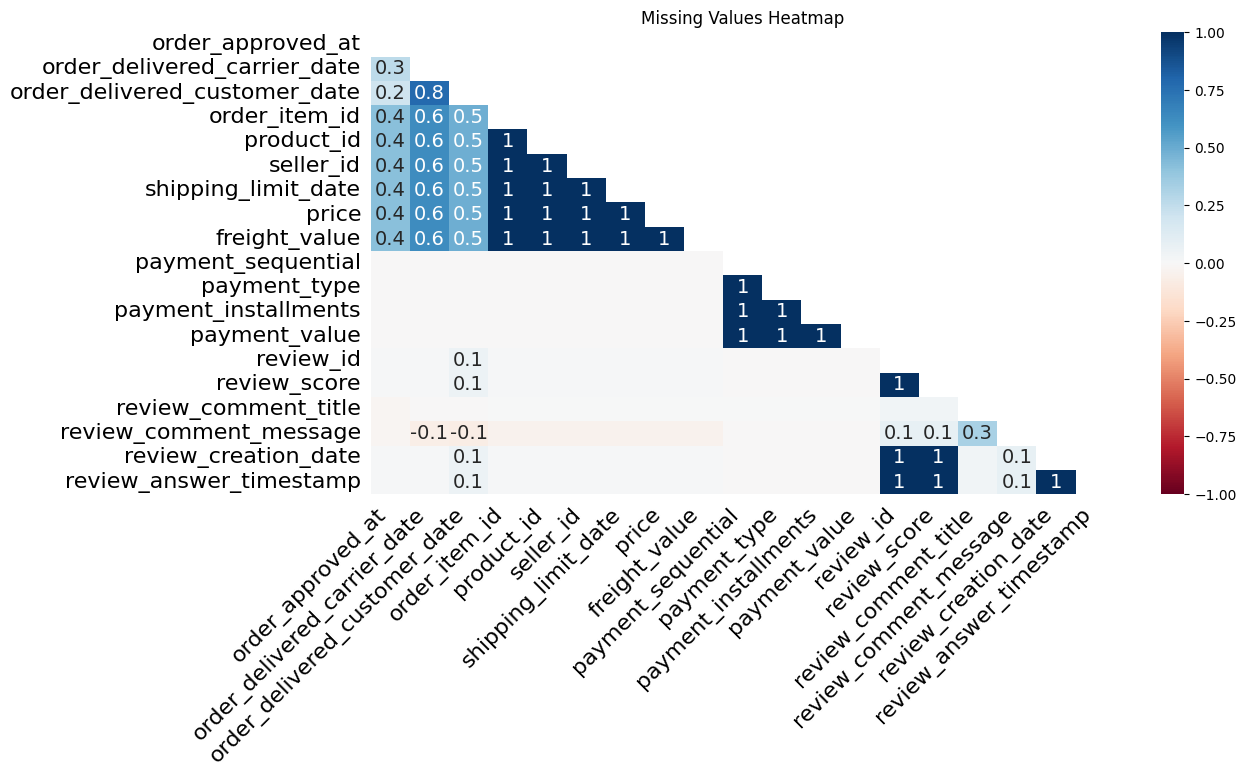

In [39]:
# Missing values Heatmap
msno.heatmap(df_orders, figsize=(12,6))
plt.title('Missing Values Heatmap')
plt.show()

From the missing value correlation plot above, we can see that there are several features that have a correlation of 1, which indicates a perfect positive relationship between the missing two features. This means that every time there is a missing value in one feature, there is also a missing value in the other features.

In [40]:
df_orders[df_orders['order_item_id'].isna()]['order_status'].value_counts()

unavailable    645
canceled       180
created          5
invoiced         2
shipped          1
Name: order_status, dtype: int64

There are various order statuses (`order_status`) associated with cases where the `order_item_id` column has missing values. The results indicate that most of the orders with missing `order_item_id` values have the status 'unavailable,' which can be considered as failed or unavailable orders.

Here is the breakdown:

- 'unavailable': which may indicate orders that couldn't be fulfilled or had other issues making them unavailable.
- 'canceled': which might be orders that were canceled either before or after processing.
- 'created', 'invoiced', 'shipped': A smaller number of orders with missing 'order_item_id,' which could represent less common conditions, such as newly created orders or orders in the invoicing or shipping process.

Therefore, based on this data, we can conclude that most orders with missing `order_item_id` can be considered as failed or unavailable orders for further processing. It's highly likely that these missing values ​​also appear in columns such as `product_id`, `seller_id`,  `shipping_limit_date`, `price`, and `freight_value` because these features have a missing value correlation of 1.

In [41]:
# Check missing values in payment details column
df_orders[df_orders['payment_sequential'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
36864,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,1.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,NaN,NaN,NaN,NaN,6916ca4502d6d3bfd39818759d55d536,1.0,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28
36865,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,2.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,NaN,NaN,NaN,NaN,6916ca4502d6d3bfd39818759d55d536,1.0,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28
36866,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,3.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,NaN,NaN,NaN,NaN,6916ca4502d6d3bfd39818759d55d536,1.0,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28


Missing value in `payment_sequential`, `payment_type`, `payment_installments`, `payment_values` ​​are a single order, we can fill in the missing values ​​based on existing order information. 
where in this order the customer buys 3 of the same items with the same `price` and `freight_value`.

In [42]:
# Define the function to fill missing values in a given column with the specified value
def fill_missing_values(df, column_name, fill_value):
    df[column_name] = np.where(df[column_name].isna(), fill_value, df[column_name])

# Fill missing 'order_approved_at' with 'order_purchase_timestamp'
fill_missing_values(df_orders, 'order_approved_at', df_orders['order_purchase_timestamp'])

# Fill missing value with 'order_estimated_delivery_date'
for i in ['order_delivered_carrier_date', 'order_delivered_customer_date']:
    fill_missing_values(df_orders, i, df_orders['order_estimated_delivery_date'])

# Fill in the missing values ​​with -1 as a sign that this data is actually invalid/missing
for i in ['order_item_id', 'price', 'freight_value']:
    fill_missing_values(df_orders, i, -1)

# For the 'shipping_limit_date', if it's missing, add 4 days to 'order_approved_at'
df_orders['shipping_limit_date'] = np.where(df_orders['shipping_limit_date'].isna(),
                                            pd.to_datetime(df_orders['order_approved_at']) + pd.Timedelta(days=4),
                                            df_orders['shipping_limit_date'])

# Fill missing value with 'unknown'
for i in ['product_id', 'seller_id', 'review_id']:
    fill_missing_values(df_orders, i, 'Unknown')

# Fill missing value with the most common value
fill_missing_values(df_orders, 'payment_type', df_orders['payment_type'].mode())

# Fill missing value with 1
for i in ['payment_sequential', 'payment_installments']:
    fill_missing_values(df_orders, i, 1)

# Fill missing value with price + freight_value columns multiplied by count of unique oder_id
fill_missing_values(df_orders, 'payment_value', (df_orders['price'] + df_orders['freight_value']) * df_orders.loc[df_orders['payment_value'].isna(), 'order_item_id'].nunique())

# Fill missing value with the most common value
fill_missing_values(df_orders, 'review_score', df_orders['review_score'].mode())

# Drop the 'review_creation_date' and 'review_answer_timestamp' columns
df_orders.drop(columns=['review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'], inplace=True)

In [43]:
df_orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
dtype: int64

In [44]:
# Replace 'payment_installments' values equal to 0 with 1
df_orders.loc[df_orders['payment_installments']==0, 'payment_installments']=1

# Check if there are any remaining rows where 'payment_installments' is equal to 0
df_orders[df_orders['payment_installments']==0]['payment_installments'].sum()

0.0

In [45]:
# Check payment_value equal to 0
df_orders[df_orders['payment_value']==0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score
504,45ed6e85398a87c253db47c2d9f48216,8eab8f9b3c744b76b65f7a2c0c8f2d6c,delivered,2017-06-08 21:18:45,2017-06-08 21:30:18,2017-06-09 08:35:18,2017-06-22 17:44:53,2017-07-10 00:00:00,1.0,75d6b6963340c6063f7f4cfcccfe6a30,cc419e0650a3c5ba77189a1882b7556a,2017-06-15 21:30:18,56.99,14.15,3.0,voucher,1.0,0.0,b59cf587845cad9af780a2f839ee6c30,1.0
1362,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,2018-08-28 15:26:39,2018-09-12 00:00:00,2018-09-12 00:00:00,2018-09-12 00:00:00,-1.0,Unknown,Unknown,1535815599000000000,-1.00,-1.00,1.0,not_defined,1.0,0.0,9c0d840dfe562debfa52a1792bd64bff,1.0
31058,fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,shipped,2017-04-20 12:45:34,2017-04-22 09:10:13,2017-04-24 11:31:17,2017-05-18 00:00:00,2017-05-18 00:00:00,1.0,1aecdb5fa3add74e385f25c6c527a462,06532f10282704ef4c69168b914b77be,2017-04-27 09:10:13,392.55,65.44,14.0,voucher,1.0,0.0,f28281373ab8815bafafe371218f02ce,1.0
31067,fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,shipped,2017-04-20 12:45:34,2017-04-22 09:10:13,2017-04-24 11:31:17,2017-05-18 00:00:00,2017-05-18 00:00:00,1.0,1aecdb5fa3add74e385f25c6c527a462,06532f10282704ef4c69168b914b77be,2017-04-27 09:10:13,392.55,65.44,13.0,voucher,1.0,0.0,f28281373ab8815bafafe371218f02ce,1.0
38754,6ccb433e00daae1283ccc956189c82ae,843b211abe7b0264dd4a69eafc5bdf43,delivered,2017-10-26 23:51:35,2017-10-27 00:46:58,2017-10-27 19:53:03,2017-11-08 18:47:00,2017-11-22 00:00:00,1.0,2ee4be9805f228255a38a6f9b03fff1a,da20530872245d6cd9d2f5725613c430,2017-11-03 00:46:58,94.00,28.04,4.0,voucher,1.0,0.0,8d0e1d286cc6f63e3a784779c9d1f7d8,4.0
47855,4637ca194b6387e2d538dc89b124b0ee,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,2018-09-03 14:14:25,2018-09-10 00:00:00,2018-09-10 00:00:00,2018-09-10 00:00:00,-1.0,Unknown,Unknown,1536329665000000000,-1.00,-1.00,1.0,not_defined,1.0,0.0,9efef4d70190c1bdb9b12872cc8144fc,3.0
48231,c8c528189310eaa44a745b8d9d26908b,197a2a6a77da93f678ea0d379f21da0a,canceled,2018-08-28 20:05:14,2018-08-28 20:05:14,2018-09-11 00:00:00,2018-09-11 00:00:00,2018-09-11 00:00:00,-1.0,Unknown,Unknown,1535832314000000000,-1.00,-1.00,1.0,not_defined,1.0,0.0,b54d02f7f1520b3995f84b77ab0dacb3,1.0
102643,b23878b3e8eb4d25a158f57d96331b18,648121b599d98c420ef93f6135f8c80c,delivered,2017-05-27 19:20:24,2017-05-27 19:35:17,2017-05-29 04:49:37,2017-06-07 08:53:10,2017-06-29 00:00:00,1.0,e306ca54c91b21392317d5b4632c9fe3,e49c26c3edfa46d227d5121a6b6e4d37,2017-06-01 19:35:17,135.30,36.27,4.0,voucher,1.0,0.0,f75bfd523e8001ea6c62f86c48fae8a9,5.0
116139,8bcbe01d44d147f901cd3192671144db,f2def7f64f36952f2f5a9791f0285f34,delivered,2018-01-24 23:24:14,2018-01-24 23:37:20,2018-01-30 22:43:30,2018-02-02 21:26:42,2018-02-21 00:00:00,1.0,85d4c1a46f08f730de651ea6f6645313,3d871de0142ce09b7081e2b9d1733cb1,2018-01-30 23:37:20,59.00,15.16,4.0,voucher,1.0,0.0,3d42038fd2a7d35a88b93cb3e51796a3,4.0


`Findings`

- **Voucher or Discount**: `payment_type` is 'voucher' for most of these transactions. It is possible that this represents the use of a voucher that covers the entire cost, so the payment value is zero. In addition, this data has a `payment_sequential` of more than 1, meaning that there are previous payment stages that allow the value to be found and deleting this row can result in the loss of the payment sequence value.

- **Payment Type Not Specified**: There is an entry with `payment_type` as 'not_defined'. This may indicate missing or incomplete data regarding how payments are processed. So we will eliminate `payment_value` of 0 with this method.

In [46]:
# Drop payment_value of 0 and not_defined payment method
notdefined_0 = df_order_payments[(df_order_payments['payment_value']==0) & (df_order_payments['payment_type']=='not_defined')]
df_order_payments.drop(notdefined_0.index, inplace=True)

# Replace "_" with spaces and convert to title case
df_order_payments['payment_type'] = df_order_payments['payment_type'].str.replace('_', ' ').str.title()

### **Merge Data**

In [47]:
# Merging multiple DataFrames into a single DataFrame 'df' using left joins
df = pd.merge(df_orders, df_cust, on='customer_id', how='left')
df = df.merge(df_sellers, on='seller_id', how='left')
df = df.merge(df_products, on='product_id', how='left')

In [48]:
# Calling the 'skimming_data' function to display an overview of the DataFrame
skimming_data(df)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,order_id,object,0.000,0.000,0.000,0,99441,"[e481f51cbdc54678b7cc49136f2d6af7, 53cdb2fc8bc..."
1,customer_id,object,0.000,0.000,0.000,0,99441,"[9ef432eb6251297304e76186b10a928d, b0830fb4747..."
2,order_status,object,0.000,0.000,0.000,0,8,"[delivered, invoiced, shipped, processing, una..."
3,order_purchase_timestamp,object,0.000,0.000,0.000,0,98875,"[2017-10-02 10:56:33, 2018-07-24 20:41:37, 201..."
4,order_approved_at,object,0.000,0.000,0.000,0,90893,"[2017-10-02 11:07:15, 2018-07-26 03:24:27, 201..."
5,order_delivered_carrier_date,object,0.000,0.000,0.000,0,81423,"[2017-10-04 19:55:00, 2018-07-26 14:31:00, 201..."
6,order_delivered_customer_date,object,0.000,0.000,0.000,0,96088,"[2017-10-10 21:25:13, 2018-08-07 15:27:45, 201..."
7,order_estimated_delivery_date,object,0.000,0.000,0.000,0,459,"[2017-10-18 00:00:00, 2018-08-13 00:00:00, 201..."
8,order_item_id,float64,0.000,0.699,0.000,0,22,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, -1.0, 7.0, 8.0,..."
9,product_id,object,0.000,0.000,0.000,0,32952,"[87285b34884572647811a353c7ac498a, 595fac2a385..."


In [49]:
# Fill missing value with -1 as our sign that this is actually invalid
fill_missing_values(df, 'seller_zip_code_prefix', -1)

# Fill missing value with Unknown
df.fillna(value='Unknown', inplace=True)

In [51]:
pd.DataFrame({
    'feature': df.select_dtypes(include=[np.number]).columns,  # Numeric column names
    'neg_value(%)': [(len(df[col][df[col] < 0]) / len(df) * 100) for col in df.select_dtypes(include=[np.number]).columns],  # Percentage of negative values for numeric columns
}).round(3)

,feature,neg_value(%)
0,order_item_id,0.699
1,price,0.699
2,freight_value,0.699
3,payment_sequential,0.000
4,payment_installments,0.000
5,payment_value,0.000
6,review_score,0.000
7,customer_zip_code_prefix,0.000
8,seller_zip_code_prefix,0.699


In [52]:
df[df['price']<0].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name
319,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,2017-12-05 00:00:00,2017-12-05 00:00:00,2017-12-05 00:00:00,-1.0,Unknown,Unknown,1511191617000000000,-1.0,-1.0,1.0,credit_card,5.0,84.00,7fb04ba6e8b915c62557517d5c1e04ee,1.0,41fc647b8c6bd979b1b6364b60471b50,89288,Sao Bento Do Sul,SC,-1.0,Unknown,Unknown,Unknown
702,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,2018-02-16 00:00:00,2018-02-16 00:00:00,2018-02-16 00:00:00,-1.0,Unknown,Unknown,1517754230000000000,-1.0,-1.0,1.0,credit_card,1.0,97.68,b6ea5566d6060db04ebe53a1291e4541,3.0,0e634b16e4c585acbd7b2e8276ce6677,11701,Praia Grande,SP,-1.0,Unknown,Unknown,Unknown
828,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,2017-09-05 00:00:00,2017-09-05 00:00:00,2017-09-05 00:00:00,-1.0,Unknown,Unknown,1503274518000000000,-1.0,-1.0,1.0,boleto,1.0,132.46,aaeb804fe1828db8cc3d8b52ec38a1fa,1.0,596ed6d7a35890b3fbac54ec01f69685,2318,Sao Paulo,SP,-1.0,Unknown,Unknown,Unknown
887,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,2018-02-06 00:00:00,2018-02-06 00:00:00,2018-02-06 00:00:00,-1.0,Unknown,Unknown,1515828368000000000,-1.0,-1.0,1.0,boleto,1.0,134.38,519e62c42f33dce5b47ffddf9fde28df,1.0,2349bbb558908e0955e98d47dacb7adb,48607,Paulo Afonso,BA,-1.0,Unknown,Unknown,Unknown
1362,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,2018-08-28 15:26:39,2018-09-12 00:00:00,2018-09-12 00:00:00,2018-09-12 00:00:00,-1.0,Unknown,Unknown,1535815599000000000,-1.0,-1.0,1.0,not_defined,1.0,0.00,9c0d840dfe562debfa52a1792bd64bff,1.0,4fa4365000c7090fcb8cad5713c6d3db,1151,Sao Paulo,SP,-1.0,Unknown,Unknown,Unknown


In this dataset, we found that about 0.699% of the data had abnormalities, and most of this data also had invalid values ​​in other columns in one data entry (which means it had a correlation of one). Therefore, to maintain data integrity and ensure its quality, abnormal data will be removed from the dataset.

In [54]:
df = df[df['price']>=0]

pd.DataFrame({
    'feature': df.select_dtypes(include=[np.number]).columns,  # Numeric column names
    'neg_value(%)': [(len(df[col][df[col] < 0]) / len(df) * 100) for col in df.select_dtypes(include=[np.number]).columns],  # Percentage of negative values for numeric columns
}).round(3)

,feature,neg_value(%)
0,order_item_id,0.0
1,price,0.0
2,freight_value,0.0
3,payment_sequential,0.0
4,payment_installments,0.0
5,payment_value,0.0
6,review_score,0.0
7,customer_zip_code_prefix,0.0
8,seller_zip_code_prefix,0.0


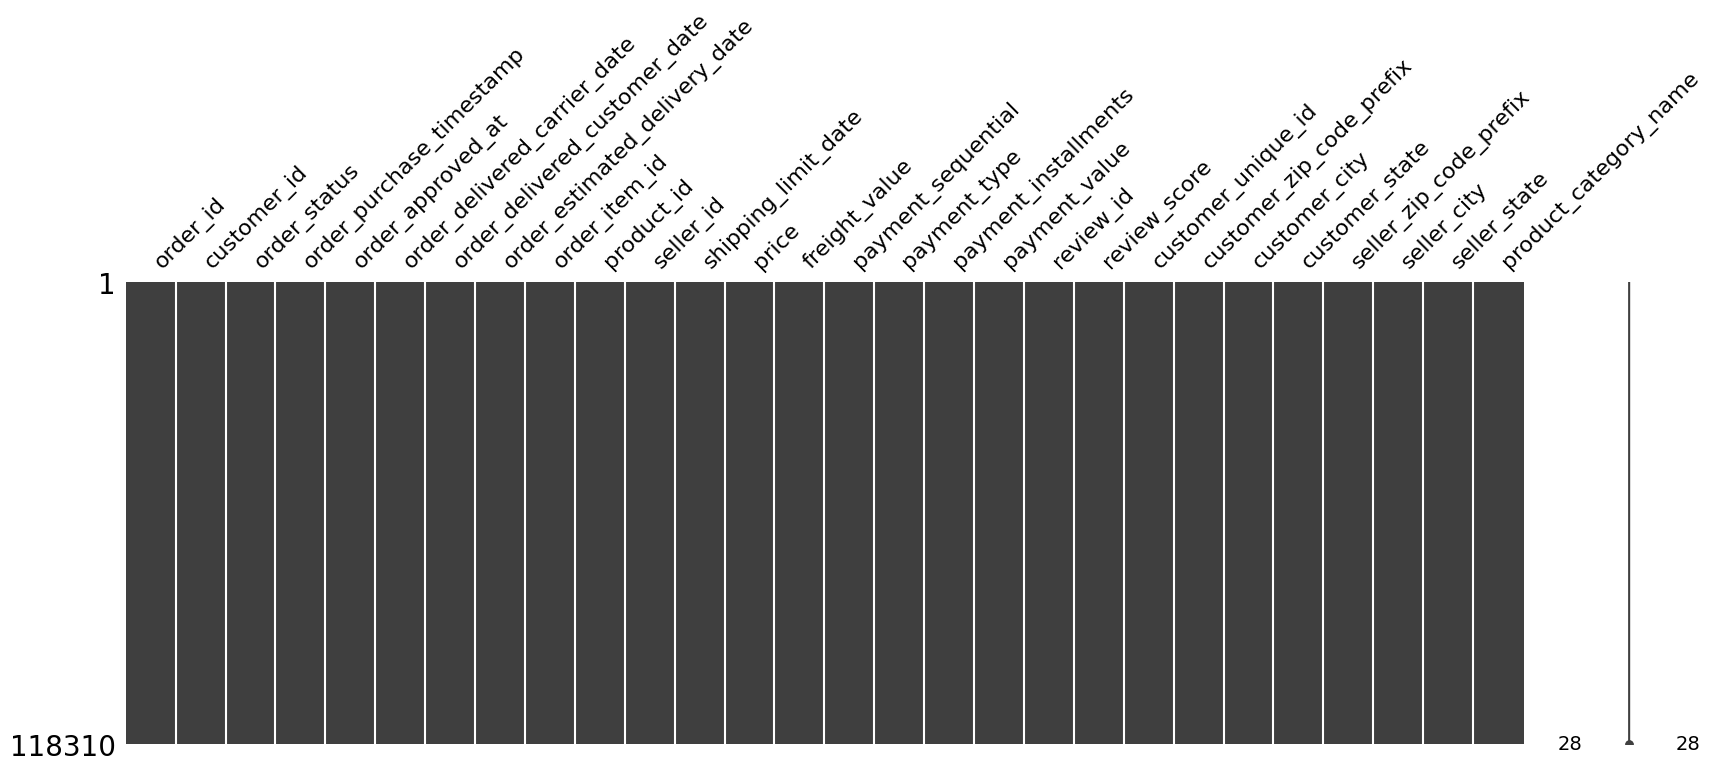

In [55]:
msno.matrix(df, figsize=(20, 6))
plt.show()

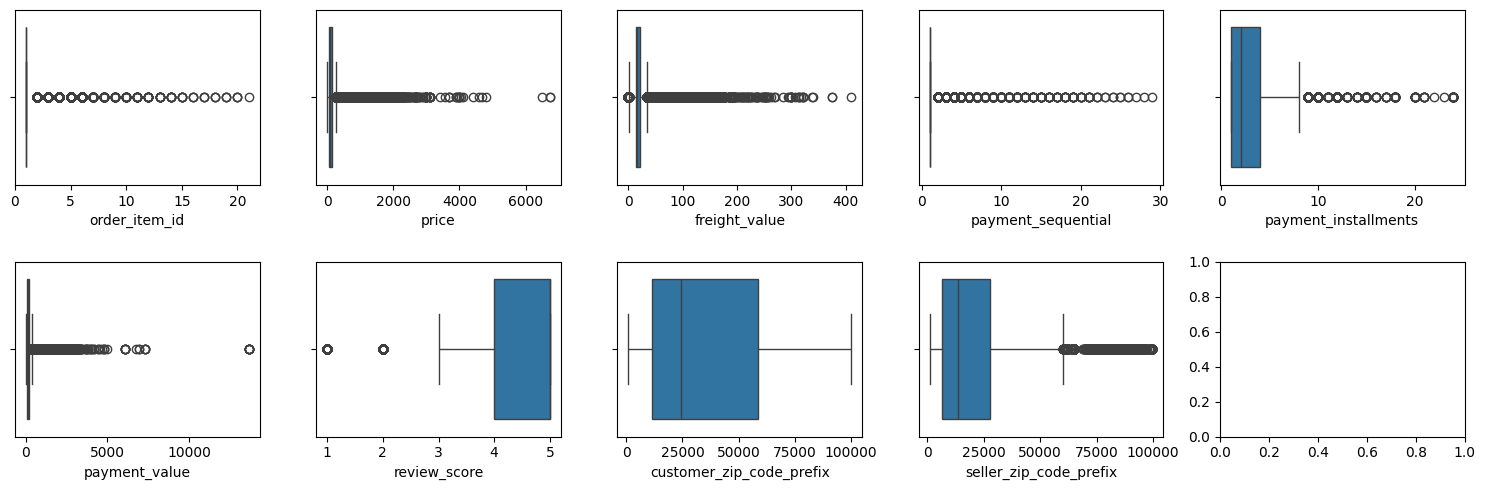

In [56]:
# Plotting oulier for numerical columns
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(15,5))
index = 0
axs = axs.flatten()
for col, val in df.select_dtypes(include=[np.number]).items():
    sns.boxplot(x=col, data=df, ax=axs[index])
    index += 1
plt.tight_layout(w_pad=0.5, h_pad=2)

`Findings`

Based on the observations of the boxplot above, several numerical columns are identified to have outliers. However, in the context of E-Commerce, the presence of these outliers is considered normal and reflects the authentic variation of the data, not due to typing errors or incorrect data entry.

# **Export Cleaned Data**

In [57]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP,9350.0,Maua,SP,Housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP,9350.0,Maua,SP,Housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP,9350.0,Maua,SP,Housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,af07308b275d755c9edb36a90c618231,47813,Barreiras,BA,31570.0,Belo Horizonte,SP,Perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,Vianopolis,GO,14840.0,Guariba,SP,Auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,1.0,credit_card,3.0,195.00,29bb71b2760d0f876dfa178a76bc4734,4.0,da62f9e57a76d978d02ab5362c509660,11722,Praia Grande,SP,17602.0,Tupa,SP,Baby
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,1.0,credit_card,5.0,271.01,371579771219f6db2d830d50805977bb,5.0,737520a9aad80b3fbbdad19b66b37b30,45920,Nova Vicosa,BA,8290.0,Sao Paulo,SP,Home Appliances
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,1.0,credit_card,4.0,441.16,8ab6855b9fe9b812cd03a480a25058a1,2.0,5097a5312c8b157bb7be58ae360ef43c,28685,Japuiba,RJ,37175.0,Ilicinea,MG,Computers Accessories
119

In [60]:
# df_geolocation.to_csv(r'./data/olist_geolocation_cleaned_dataset.csv', index= False)
# df.to_csv(r'./data/olist_cleaned_dataset.csv', index= False)